# Práctica 2. Fórmulas de derivación e integración numérica

> Alumno: Miguel Ángel Fernández Gutiérrez ([mianfg@correo.ugr.es](mailto:mianfg@correo.ugr.es))
>
> 3º Doble Grado en Ingeniería Informática y Matemáticas, 2019/2020

###### Importar módulos de Python necesarios

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Ejercicio 1

Obtenga mediante interpolación en el espacio $\mathbb{P}_2$ una fórmula para aproximar $f''(a)$ del tipo combinación
de $f(a-h)$, $f(a)$ y $f(a+h)$.

### Solución al ejercicio 1

Lo haremos mediante los polinomios de Lagrange.

In [2]:
f = sp.Function('f')
a,h = sp.symbols('a,h')
x = [a-h,a,a+h]

In [3]:
y = [f(i) for i in x]
y

[f(a - h), f(a), f(a + h)]

In [4]:
z = sp.Symbol('z')
p0 = y[0]
p1 = p0 + (z-x[0])/(x[1]-x[0])*(y[1]-y[0])
D = sp.Symbol('D')
p2 = p1 + (z-x[0])*(z-x[1])*D
sol2 = sp.solve(p2.subs({z:x[2]})-y[2],D)
D = sol2[0]
p2 = p1 + (z-x[0])*(z-x[1])*D
p2

f(a - h) + (f(a) - f(a - h))*(-a + h + z)/h + (-a + z)*(-a + h + z)*(-2*f(a) + f(a - h) + f(a + h))/(2*h**2)

Nótese que el polinomio interpola a $f$ en los puntos $a-h,a,a+h$:

In [5]:
[p2.subs({z:x[i]})==y[i] for i in range(0,3)]

[True, True, True]

Ahora sencillamente derivamos dos veces el polinomio de interpolación, y obtendremos la fórmula pedida para evaluar la derivada segunda en $a$:

In [6]:
d1 = sp.diff(p2,z,2).subs({z:a}).simplify()
d1

(-2*f(a) + f(a - h) + f(a + h))/h**2

Quedando por tanto que:$$f''(a)\approx\frac{f(a-h)-2f(a)+f(a+h)}{h^2}$$

## Ejercicio 2

Con la fórmula obtenida en el ejercicio 1, halle una tabla de aproximaciones y errores de $f_1''(2.5)$, siendo $f_1(x)=x^x$, para $h=10^{-i},\; i=1,\ldots,5.$

### Solución al ejercicio 2

Realizaremos dicha tabla

In [7]:
def func(z):
    return z**z
f = func

In [8]:
valor_exacto = sp.diff(f(z),z,2).subs({z:2.5})
valor_exacto

40.2416648563875

In [9]:
def formula(f, a, h):
    return (-2*f(a)+f(a-h)+f(a+h))/h**2

In [10]:
valores_aproximados = [formula(f=lambda z:z**z, a=2.5, h=10**(-i)) for i in range(1,6)]
valores_aproximados

[40.42056829795832,
 40.243450230939004,
 40.24168270788664,
 40.24166475602442,
 40.24164113047845]

Expresaremos los errores a continuación:

In [11]:
errores = [abs(valor_aproximado - valor_exacto) for valor_aproximado in valores_aproximados]

In [12]:
print("Valor exacto: {}\n".format(valor_exacto))

#from tabulate import tabulate
#print(tabulate([["10**{}".format(-i), valores_aproximados[i-1], errores[i-1]] for i in range(1,6)], headers=['h', 'Aproximación', 'Error'], tablefmt='orgtbl'))

print("h\tAproximación\t\tError")
print("-\t------------\t\t-----")
for i in range(1,6):
    print("10^{}\t{}\t{}".format(-i, valores_aproximados[i-1], errores[i-1]))

Valor exacto: 40.2416648563875

h	Aproximación		Error
-	------------		-----
10^-1	40.42056829795832	0.178903441570853
10^-2	40.243450230939004	0.00178537455153815
10^-3	40.24168270788664	0.0000178514991731049
10^-4	40.24166475602442	1.00363045874019E-7
10^-5	40.24164113047845	0.0000237259090170028


## Ejercicio 3

Sea $f_2(x)=\frac{x^2+40}{x+\sqrt{5x}+7}$. Calcule una tabla que recoja las derivadas de $f_2$ en $x_i=1,2,\ldots,10$, utilizando alguna de las fórmulas de derivación numérica de primer orden obtenidas al inicio de la práctica, con $h=10^{-3}$, y muestre al mismo tiempo el error cometido en cada punto. Repita el ejercicio con la fórmula centrada obtenida para la derivada primera y, finalmente, para la obtenida en el ejercicio 1 (con respecto a la segunda derivada).

### Solución al ejercicio 3

Usaremos las tres fórmulas de derivación a continuación. La primera de ellas para aproximar $f_2'(x)$ será$$f_2'(x)\approx \frac{f_2(x+h)-f_2(x)}{h}$$

In [13]:
def func(z):
    return (z**2+40)/(z+(5*z)**(1/2)+7)
f = func

def formula(f, a, h):
    return (f(a+h)-f(a))/h

In [14]:
valores_aproximados = [formula(f=lambda z:(z**2+40)/(z+(5*z)**(1/2)+7), a=i, h=10**(-3)) for i in range(1,11)]
valores_aproximados

[-0.6330758508230616,
 -0.20358841102519065,
 0.013637834543889227,
 0.15241382963759875,
 0.2509073591920874,
 0.32526720196468517,
 0.3837792735330581,
 0.43122332479583747,
 0.47058475905004116,
 0.5038394181333672]

In [15]:
deriv = sp.diff(f(z),z)
valores_exactos = [deriv.subs({z:i}) for i in range(1,11)]
valores_exactos

[-0.633413841504903,
 -0.203729991363422,
 0.0135536765957583,
 0.152356382446352,
 0.250865051903114,
 0.325234486346073,
 0.383753089267232,
 0.431201820656649,
 0.470566739057635,
 0.503824070415537]

In [16]:
errores = [abs(val_aprox - val_exact) for (val_aprox, val_exact) in zip(valores_aproximados, valores_exactos)]

In [17]:
print("h\tValor exacto\t\tAproximación\t\tError")
print("-\t------------\t\t------------\t\t-----")
for i in range(1,6):
    print("10^{}\t{}\t{}\t{}".format(-i, valores_exactos[i-1], valores_aproximados[i-1], errores[i-1]))

h	Valor exacto		Aproximación		Error
-	------------		------------		-----
10^-1	-0.633413841504903	-0.6330758508230616	0.000337990681841038
10^-2	-0.203729991363422	-0.20358841102519065	0.000141580338231473
10^-3	0.0135536765957583	0.013637834543889227	0.0000841579481308807
10^-4	0.152356382446352	0.15241382963759875	0.0000574471912467844
10^-5	0.250865051903114	0.2509073591920874	0.0000423072889731979


Lo haremos de forma análoga con la fórmula centrada:$$f_2'(x)\approx\frac{f_2(x+h)-f_2(x-h)}{2h}$$

In [18]:
def formula(f, a, h):
    return (f(a+h)-f(a-h))/(2*h)

In [19]:
valores_aproximados = [formula(f=lambda z:(z**2+40)/(z+(5*z)**(1/2)+7), a=i, h=10**(-3)) for i in range(1,11)]
valores_aproximados

[-0.6334139834538455,
 -0.20373002121565342,
 0.013553664382381925,
 0.15235637597976748,
 0.25086504797688924,
 0.3252344837485488,
 0.38375308744642567,
 0.4312018193228795,
 0.4705667380475731,
 0.50382406963001]

In [20]:
errores = [abs(val_aprox - val_exact) for (val_aprox, val_exact) in zip(valores_aproximados, valores_exactos)]

In [21]:
print("h\tValor exacto\t\tAproximación\t\tError")
print("-\t------------\t\t------------\t\t-----")
for i in range(1,6):
    print("10^{}\t{}\t{}\t{}".format(-i, valores_exactos[i-1], valores_aproximados[i-1], errores[i-1]))

h	Valor exacto		Aproximación		Error
-	------------		------------		-----
10^-1	-0.633413841504903	-0.6334139834538455	1.41948942822268E-7
10^-2	-0.203729991363422	-0.20373002121565342	2.98522312980332E-8
10^-3	0.0135536765957583	0.013553664382381925	1.22133764213217E-8
10^-4	0.152356382446352	0.15235637597976748	6.46658449010573E-9
10^-5	0.250865051903114	0.25086504797688924	3.92622495626327E-9


Nótese cómo los errores son considerablemente menores para la fórmula centrada. Usaremos finalmente la fórmula centrada obtenida en [el ejercicio 1](#Solución-al-ejercicio-1) para aproximar la derivada de segundo orden de $f_2$:$$f_2(x)\approx\frac{f_2(x-h)-2f_2(x)+f_2(x+h)}{h^2}$$

In [22]:
def formula(f, a, h):
    return (f(a-h)-2*f(a)+f(a+h))/(h**2)

In [23]:
valores_aproximados = [formula(f=lambda z:(z**2+40)/(z+(5*z)**(1/2)+7), a=i, h=10**(-3)) for i in range(1,11)]
valores_aproximados

[0.6762652615677212,
 0.2832203809255418,
 0.1683403230146041,
 0.11490731566254908,
 0.08462243039630835,
 0.06543643227274742,
 0.05237217326481414,
 0.04301094591596666,
 0.036042004936120975,
 0.03069700671431974]

In [24]:
deriv = sp.diff(f(z),z,2)
valores_exactos = [deriv.subs({z:i}) for i in range(1,11)]
valores_exactos

[0.676265098285376,
 0.283220364176106,
 0.168340319928121,
 0.114907312895053,
 0.0846224302869937,
 0.0654364313639429,
 0.0523721743690358,
 0.0430109449028751,
 0.0360420057237485,
 0.0306970066620211]

In [25]:
errores = [abs(val_aprox - val_exact) for (val_aprox, val_exact) in zip(valores_aproximados, valores_exactos)]

In [26]:
print("h\tValor exacto\t\tAproximación\t\tError")
print("-\t------------\t\t------------\t\t-----")
for i in range(1,6):
    print("10^{}\t{}\t{}\t{}".format(-i, valores_exactos[i-1], valores_aproximados[i-1], errores[i-1]))

h	Valor exacto		Aproximación		Error
-	------------		------------		-----
10^-1	0.676265098285376	0.6762652615677212	1.63282345311266E-7
10^-2	0.283220364176106	0.2832203809255418	1.67494356717590E-8
10^-3	0.168340319928121	0.1683403230146041	3.08648318014804E-9
10^-4	0.114907312895053	0.11490731566254908	2.76749589911418E-9
10^-5	0.0846224302869937	0.08462243039630835	1.09314654550552E-10


## Ejercicio 4

Divida el intervalo $[1,2]$ en 100 partes iguales y aplique las fórmulas del rectángulo, Simpson y trapecio compuestas para aproximar la integral en dicho intervalo de $f_1$. Compare dichos resultados.

### Solución al ejercicio 4

Primero crearemos las funciones para computar cada una de las fórmulas compuestas:

In [27]:
def formula_rectangulo_izquierda(f, a, b, nx):
    h = (b-a)/nx
    return h*sum([f(a+i*h) for i in range(0,nx)])

def formula_rectangulo_derecha(f, a, b, nx):
    h = (b-a)/nx
    return h*sum([f(a+(i+1)*h) for i in range(0,nx)])

def formula_simpson(f, a, b, nx):
    h = (b-a)/nx
    m = int(nx/2)
    P = sum([f(a+2*i*h) for i in range(1,m)])
    I = sum([f(a+(2*i-1)*h) for i in range(1,m+1)])
    E = f(a)+f(b)
    return h/3*(E+2*P+4*I)

def formula_trapecio(f, a, b, nx):
    h = (b-a)/nx
    return h/2*(f(a)+2*sum([f(a+i*h) for i in range(1,nx)])+f(b))

Calcularemos el valor exacto de la integral primeramente:

In [28]:
def func(z):
    return z**z
f = func
a, b = 1, 2
valor_exacto = sp.integrate(f(z),[z,a,b])
valor_exacto

Integral(z**z, (z, 1, 2))

Vemos que `sympy` no es capaz de calcular el valor exacto de esta integral (algo que esperábamos). Tomaremos el valor exacto de esta integral como la aproximación de `quad`, de `scipy` (para tener una referencia). Incidiremos en que tenemos ya un error en esta aproximación, pero lo tomaremos como el _valor exacto_ igualmente. Más adelante veremos que podemos tomarlo como referencia a la hora de ver qué método nos da una aproximación más exacta.

In [29]:
from scipy.integrate import quad
valor_exacto, abserr = quad(f, a, b)
valor_exacto, abserr

(2.050446234534731, 2.2764526203364124e-14)

In [30]:
n = 100
valores_aproximados = {}
formulas = ['r_izquierda', 'r_derecha', 'simpson ', 'trapecio']
valores_aproximados[formulas[0]] = formula_rectangulo_izquierda(f, a, b, n)
valores_aproximados[formulas[1]] = formula_rectangulo_derecha(f, a, b, n)
valores_aproximados[formulas[2]] = formula_simpson(f, a, b, n)
valores_aproximados[formulas[3]] = formula_trapecio(f, a, b, n)

In [31]:
print("Valor \"exacto\": {}\n".format(valor_exacto))

print("Fórmula\t\tAproximación\t\tError")
print("-------\t\t------------\t\t-----")
for formula in formulas:
    print("{}\t{}\t{}".format(formula, valores_aproximados[formula], abs(valores_aproximados[formula]-valor_exacto)))

Valor "exacto": 2.050446234534731

Fórmula		Aproximación		Error
-------		------------		-----
r_izquierda	2.0354943390855573	0.014951895449173858
r_derecha	2.065494339085557	0.015048104550825947
simpson 	2.050446235955426	1.4206946730155323e-09
trapecio	2.0504943390855574	4.8104550826266745e-05


Vemos que el que estaría más cerca del valor exacto de la integral sería el del Simpson (nótese que los errores que hemos obtenido nosotros son del orden de $10^{-9}$ mientras que el error de `quad` es de $10^{-14}$, considerablemente mejor, y por eso podemos decir que el valor aproximado por Simpson es el más cercano al valor exacto de la integral.

## Ejercicio 5

Repita el ejercicio 4 para $f_2$. 

### Solución al ejercicio 5

In [32]:
def func(z):
    return (z**2+40)/(z+(5*z)**(1/2)+7)
f = func
a, b = 1, 2

In [33]:
valor_exacto = sp.integrate((z**2+40)/(z+sp.sqrt(5*z)+7),[z,a,b])
valor_exacto

-270*sqrt(115)*atan(sqrt(115)/23 + 2*sqrt(46)/23)/23 - 52*sqrt(5)/3 - 9*log(4*sqrt(5) + 32) - 1/2 + 9*log(4*sqrt(10) + 36) + 50*sqrt(10)/3 + 270*sqrt(115)*atan(2*sqrt(23)/23 + sqrt(115)/23)/23

In [34]:
# igualamos valor_exacto a la representación decimal para agilizar los cálculos
valor_exacto = valor_exacto.evalf()
valor_exacto

3.77658111776791

In [35]:
n = 100
valores_aproximados = {}
formulas = ['r_izquierda', 'r_derecha', 'simpson ', 'trapecio']
valores_aproximados[formulas[0]] = formula_rectangulo_izquierda(f, a, b, n)
valores_aproximados[formulas[1]] = formula_rectangulo_derecha(f, a, b, n)
valores_aproximados[formulas[2]] = formula_simpson(f, a, b, n)
valores_aproximados[formulas[3]] = formula_trapecio(f, a, b, n)

In [36]:
print("Valor \"exacto\": {}\n".format(valor_exacto))

print("Fórmula\t\tAproximación\t\tError")
print("-------\t\t------------\t\t-----")
for formula in formulas:
    print("{}\t{}\t{}".format(formula, valores_aproximados[formula], abs(valores_aproximados[formula]-valor_exacto)))

Valor "exacto": 3.77658111776791

Fórmula		Aproximación		Error
-------		------------		-----
r_izquierda	3.778523202782093	0.00194208501418336
r_derecha	3.774646194132547	0.00193492363536274
simpson 	3.776581117805272	3.73621134031055E-11
trapecio	3.77658469845732	0.00000358068941030965


De nuevo vemos que Simpson es, con diferencia, la que da la mejor aproximación.

## Ejercicio 6

Sea $f_3(x)=x^{15} e^x$ en $[0,2]$. Vamos a dividir el intervalo en $10\times 2^n$ subintervalos, es decir, $10,\,20,\,40,\, 80,\ldots $ y a aplicar la fórmula de Simpson compuesta hasta que la diferencia entre dos aproximaciones consecutivas (por ejemplo, podrían
ser con $20$ y $40$ subintervalos) sea menor que $10^{-2}$, dando en tal caso por buena la última aproximación obtenida. Programe
y calcule dicha aproximación. Compare ambas aproximaciones con
el valor exacto.

### Solución al ejercicio 6

Crearemos un sencillo algoritmo para calcular el valor aproximado de acuerdo a los criterios del enunciado.

In [37]:
def f(z):
    return z**15*np.exp(z)

def dif(a, b, n):
    return (b-a)/n

a, b = 0, 2
n = 10

d = dif(a, b, n)
while d >= 10**(-2):
    valor_aproximado = formula_simpson(f, a, b, n)
    n *= 2
    d = dif(a, b, n)

print('Número de subintervalos: ', n)
print('Valor aproximado: ', valor_aproximado)

Número de subintervalos:  320
Valor aproximado:  27062.719549167832


Compararemos la aproximación obtenida con el valor exacto.

In [38]:
valor_exacto = sp.integrate(z**15*sp.exp(z), [z,a,b])
valor_exacto.evalf()

27062.7024138996

In [39]:
error = abs(valor_aproximado - valor_exacto).evalf()
error

0.0170685222739292

## Ejercicio 7

Calcule las fórmulas gaussianas con $2$ y $3$ nodos, en el intervalo $[-1,1]$, siendo la función peso el valor absoluto de la variable. Aplíquelas para aproximar la función $x\; e^x$ en $[-1,1]$ y compare los resultados con el valor exacto (organizando los cálculos de forma adecuada).

### Solución al ejercicio 7

Basta realizar un procedimiento similar al del Notebook de la práctica. Nosotros programaremos una función para modularizar este procedimiento.

In [40]:
def get_nodos_gauss(w, a, b, n):
    x = sp.Symbol('x')
    grexact = 2*n-1
    
    p = sp.symbols('p0:'+ str(n)) # generamos una tupla de n nodos
    nodos = list(p)
    c = sp.symbols('c0:'+ str(n)) # generamos una tupla de n coeficientes
    coefs = list(c)
    
    incogs = nodos + coefs
    ecs = [np.dot([(z**i).subs({z:nodos[j]}) \
                   for j in range(n)],coefs)-sp.integrate(w(x)*x**i,(x,a,b)) \
                       for i in range(grexact+1)]
    solsGauss = sp.solve(ecs,incogs)
    
    for i in range(n):
        nodos[i] = solsGauss[0][i]
        coefs[i] = solsGauss[0][n+i]
    
    return [{'coef': coefs[i], 'nodo': nodos[i]} for i in range(n)]

Nótese que devuelve un array de dicts. Esto es así para facilitar la sustitución de los valores. Probaremos con dos y tres nodos en el intervalo $[-1,1]$, siendo $\omega(x)=|x|$.

In [41]:
def w(x):
    return abs(x)
ng2 = get_nodos_gauss(w, -1, 1, 2)
ng2

[{'coef': 1/2, 'nodo': -sqrt(2)/2}, {'coef': 1/2, 'nodo': sqrt(2)/2}]

In [42]:
ng3 = get_nodos_gauss(w, -1, 1, 3)
ng3

[{'coef': 1/4, 'nodo': 0},
 {'coef': 3/8, 'nodo': -sqrt(6)/3},
 {'coef': 3/8, 'nodo': sqrt(6)/3}]

Intentaremos aproximar:$$\int_{-1}^1\omega(x)x e^x dx = \int_{-1}^1|x| x e^x dx$$

Primero calculamos el valor exacto:

In [43]:
def f(x):
    return x*sp.exp(x)

In [44]:
valor_exacto = sp.integrate(w(z)*f(z), [z,-1,1])
valor_exacto

-4 + 5*exp(-1) + E

In [45]:
# para agilizar los cálculos y mostrar directamente el resultado decimal
valor_exacto = valor_exacto.evalf()

In [46]:
def evaluar_gauss(f, nodos_gauss):
    aprox = 0
    for nodo in nodos_gauss:
        aprox += nodo['coef']*f(nodo['nodo'])

    return aprox

In [47]:
valores_aproximados = {}
valores_aproximados[2] = evaluar_gauss(f, ng2).evalf()
valores_aproximados[3] = evaluar_gauss(f, ng3).evalf()

In [48]:
print("Valor exacto: {}\n".format(valor_exacto))

print("n\tAproximación\t\tError")
print("-\t------------\t\t-----")
for i in [2, 3]:
    print("{}\t{}\t{}".format(i, valores_aproximados[i], valores_aproximados[i]-valor_exacto))

Valor exacto: 0.557679034316257

n	Aproximación		Error
-	------------		-----
2	0.542720820636303	-0.0149582136799534
3	0.557437075708894	-0.000241958607363313


Vemos que, evidentemente, a mayor número de nodos, menor es el error.

## Ejercicio 8

Programar las técnicas de integración de Romberg y adaptativa, para después aplicarlas a la aproximación de la siguiente integral $$\int_a^b p(x)\, dx$$
siendo  $\;a=\displaystyle\min_{0\leq i\leq 7}{d_i}$, $\;b=\displaystyle\max_{0\leq i\leq 7}{d_i}$ y 
$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
(siendo $d_0, d_1, \ldots, d_7$ los dígitos de su DNI, pasaporte o tarjeta de residente).

### Solución al ejercicio 8

> **Nota:** para proteger mis datos personales, supondremos que mi DNI es 12345678.

Primero veamos cuál sería "mi polinomio", se trataría de:$$p(x)=1+2x+3x^2+4x^3+5x^4+6x^5+7x^6+8x^7$$
Y los límites de integración serían, en mi caso, $a=1,b=8$.

In [49]:
a, b = 1, 8
def p(x):
    return 1+2*x+3*x**2+4*x**3+5*x**4+6*x**5+7*x**6+8*x**7

Veamos primeramente el valor exacto de $\int_a^bp(x)dx$.

In [50]:
valor_exacto = sp.integrate(p(z), [z, a, b])
valor_exacto

19173952

En forma decimal es:

In [51]:
valor_exacto = valor_exacto.evalf()
valor_exacto

19173952.0000000

###### Algoritmo de integración Romberg

La integración Romberg consiste en hallar la sucesión de aproximaciones $\{R(N,N)\}_{N=0}^\infty$. Sería sencillo programar un algoritmo recursivo para obtener $R(M,M)$ dado un $M$, pero no tendría mucho interés práctico. Programaremos por tanto un algoritmo que irá calculando $R(M,M)$ partiendo de $M=0$ y que parará cuando la diferencia absoluta de los dos últimos términos calculados sea menor que una cierta tolerancia, `tol`.

$$\begin{matrix}
R(0,0)\\
R(1,0) & R(1,1)\\
R(2,0) & R(2,1) & R(2,2)\\
\vdots & \vdots & \vdots & \ddots \\
R(N,0) & R(N,1) & R(N,2) & \cdots & R(N,N)
\end{matrix}$$

Usaremos que:

$$R(j,0)=T_{2^j},\;\;\;\;R(j,k)=\frac{4^k R(j,k-1)-R(j-1,k-1)}{4^k-1}\;\text{con}\;j=0,1,...,N;k=1,...,j$$

donde $T_n$ es la fórmula del trapecio compuesta en $[a,b]$ con $n$ nodos (programada en la [solución al ejercicio 4](#Solución-al-ejercicio-4)).

Este algoritmo funcionará almacenando únicamente las filas necesarias para calcular la última iteración de la sucesión (teniendo en cuenta que, de regalo, nos llevamos que para calcular la última iteración nos hace falta almacenar la fila de la iteración anterior, permitiéndonos hacer la comprobación de la tolerancia aquí).

In [52]:
def integracion_romberg(f, a, b, tol=10**(-4)):
    n = 0
    r0 = [formula_trapecio(f, a, b, 2**n)]
    continuar = True
    
    while continuar:
        n += 1
        r1 = [formula_trapecio(f, a, b, 2**n)]
        
        for i in range(0, n):
            r1.append((4**n*r1[i-1]-r0[n-1])/(4**n-1))

        continuar = (abs(r1[n]-r0[n-1]) >= tol)
        r0 = r1
    
    return r1[n]

Lo aplicamos a continuación a nuestro polinomio.

In [53]:
valor_aproximado = integracion_romberg(p, a, b)
valor_aproximado

19173952.00001504

Observemos cómo obtenemos una aproximación bastante buena (nótese que hemos fijado una tolerancia de $10^{-4}$):

In [54]:
error_romberg = abs(valor_exacto - valor_aproximado)
error_romberg

1.50389969348907e-5

###### Algoritmo de integración adaptativa

In [55]:
def formula_simpson(f, a, b):
    m = (a+b)/2
    return (b-a)/6*(f(a)+4*f(m)+f(b))

def integracion_adaptativa(f, a, b, e=10**(-3)):
    m = (a+b)/2
    s = formula_simpson(f, a, m) + formula_simpson(f, m, b)
    return s if ( abs(s-formula_simpson(f, a, b)) < 10*e ) \
        else integracion_adaptativa(f, a, m, e/2) + integracion_adaptativa(f, m, b, e/2)

Veamos la forma que tiene nuestro polinomio, y así podremos predecir en cierto modo cómo se comportará el algoritmo de integración adaptativa.

In [56]:
valor_aproximado = integracion_adaptativa(p, a, b)
valor_aproximado

19173952.00021446

Para hacer plot incluyendo las subdivisiones del algoritmo de integración adaptativa, usaremos una ligera variación de la función en la que usaremos una variable de scope `global`. Es muy importante puntualizar que esta no es una buena práctica de diseño en Python, y que es posible crear una función equivalente sin necesidad de usar `global`, pero sería un tanto ilegible (en otros lenguajes como C o Java sería más sencillo, pues bastaría pasar parámetros por referencia). Por tanto, lo siguiente colmará nuestro propósito sobradamente. Ejecutaremos esta función modificada que, además, almacena estas subdivisiones en el vector `subdivisiones`:

In [57]:
subdivisiones = []
def integracion_adaptativa_s(f, a, b, e=10**(-3)):
    global subdivisiones
    m = (a+b)/2
    s = formula_simpson(f, a, m) + formula_simpson(f, m, b)
    if ( abs(s-formula_simpson(f, a, b)) < 10*e ):
        return s
    else:
        subdivisiones.append(m)
        return integracion_adaptativa_s(f, a, m, e/2) + integracion_adaptativa_s(f, m, b, e/2)

El resultado es el mismo:

In [58]:
integracion_adaptativa_s(p, a, b)

19173952.00021446

Pero, además, tenemos datos en `subdivisiones`:

In [59]:
subdivisiones

[4.5,
 2.75,
 1.875,
 1.4375,
 1.21875,
 1.109375,
 1.328125,
 1.65625,
 1.546875,
 1.6015625,
 1.765625,
 1.7109375,
 1.8203125,
 2.3125,
 2.09375,
 1.984375,
 1.9296875,
 2.0390625,
 2.203125,
 2.1484375,
 2.2578125,
 2.53125,
 2.421875,
 2.3671875,
 2.4765625,
 2.640625,
 2.5859375,
 2.6953125,
 3.625,
 3.1875,
 2.96875,
 2.859375,
 2.8046875,
 2.9140625,
 3.078125,
 3.0234375,
 3.1328125,
 3.40625,
 3.296875,
 3.2421875,
 3.3515625,
 3.515625,
 3.4609375,
 3.5703125,
 4.0625,
 3.84375,
 3.734375,
 3.6796875,
 3.7890625,
 3.953125,
 3.8984375,
 4.0078125,
 4.28125,
 4.171875,
 4.1171875,
 4.08984375,
 4.14453125,
 4.2265625,
 4.19921875,
 4.25390625,
 4.390625,
 4.3359375,
 4.30859375,
 4.36328125,
 4.4453125,
 4.41796875,
 4.47265625,
 6.25,
 5.375,
 4.9375,
 4.71875,
 4.609375,
 4.5546875,
 4.52734375,
 4.58203125,
 4.6640625,
 4.63671875,
 4.69140625,
 4.828125,
 4.7734375,
 4.74609375,
 4.80078125,
 4.8828125,
 4.85546875,
 4.91015625,
 5.15625,
 5.046875,
 4.9921875,
 4.9648437

Haremos plot de la función junto con las subdivisiones del algoritmo de integración adaptativa:

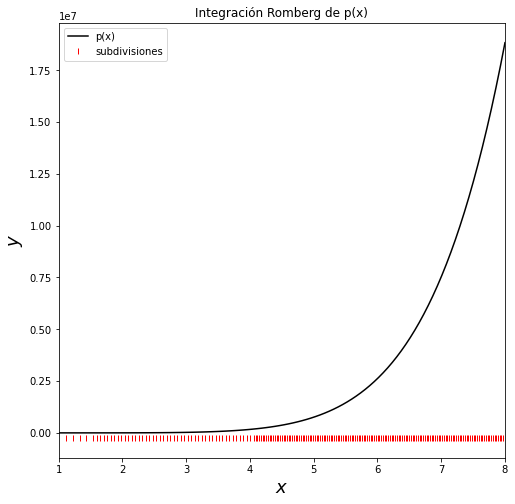

In [60]:
nxx = 100
xx = np.linspace(float(a),float(b),nxx)
yy = p(xx)
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(xx,yy,'k',label='p(x)')
for subd in subdivisiones:
    ax.plot(subd,-12**5,'r|')
ax.plot(-1,0,'r|', label='subdivisiones')
ax.legend(loc='upper left')
ax.set_xlim([a,b])
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_title('Integración Romberg de p(x)');

Vemos cómo hay más subdivisiones donde más "cambia" $p$.

In [61]:
error_adaptativa = abs(valor_exacto - valor_aproximado)
error_adaptativa

0.000214461237192154

Vemos que el error de la aproximación por integración Romberg es menor que el de la aproximación por integración adaptativa con nuestros criterios de tolerancia y $epsilon$, respectivamente para cada uno de ellos:

In [62]:
error_romberg < error_adaptativa

True